In [2]:
%pip install quantstats

     ---------------------------------------- 45.5/45.5 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import yfinance as yf
import quantstats as qs

In [4]:
portfolio = pd.read_csv('./data_snapshot.csv')

In [7]:
portfolio['Date'] = pd.to_datetime(portfolio['Date'])
portfolio.set_index('Date', inplace=True)

In [8]:
portfolio

,Open,High,Low,Close,Adj Close,Volume,ticker
Date,,,,,,,
2022-08-01,161.009995,163.589996,160.889999,161.509995,159.703140,67829400,AAPL
2022-08-02,160.100006,162.410004,159.630005,160.009995,158.219910,59907000,AAPL
2022-08-03,160.839996,166.589996,160.750000,166.130005,164.271500,82507500,AAPL
2022-08-04,166.009995,167.190002,164.429993,165.809998,163.955063,55474100,AAPL
2022-08-05,163.210007,165.850006,163.000000,165.350006,163.727341,56697000,AAPL
...,...,...,...,...,...,...,...
2024-07-24,173.600006,176.190002,171.820007,172.630005,172.630005,49585200,GOOGL
2024-07-25,172.520004,173.419998,167.190002,167.279999,167.279999,44852000,GOOGL
2024-07-26,167.149994,168.089996,164.059998,167.000000,167.000000,41336900,GOOGL


In [12]:
tickers = portfolio['ticker'].unique().tolist()
benchmark = None


 Daily Returns: 

AAPL


[*********************100%%**********************]  1 of 1 completed


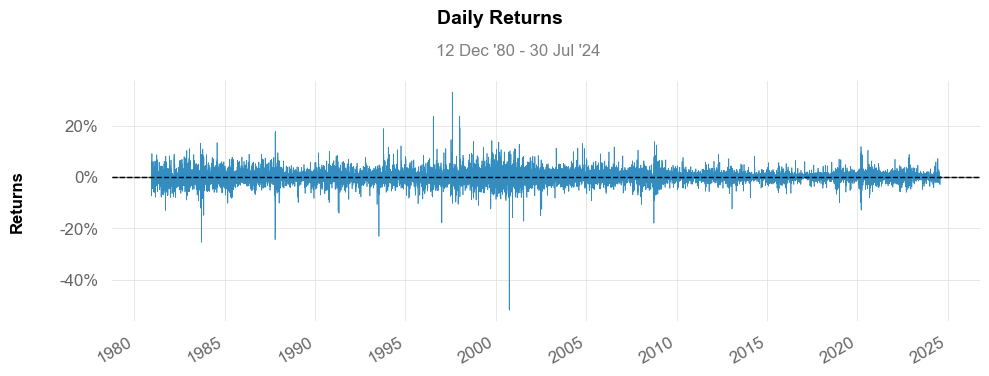

MSFT


[*********************100%%**********************]  1 of 1 completed


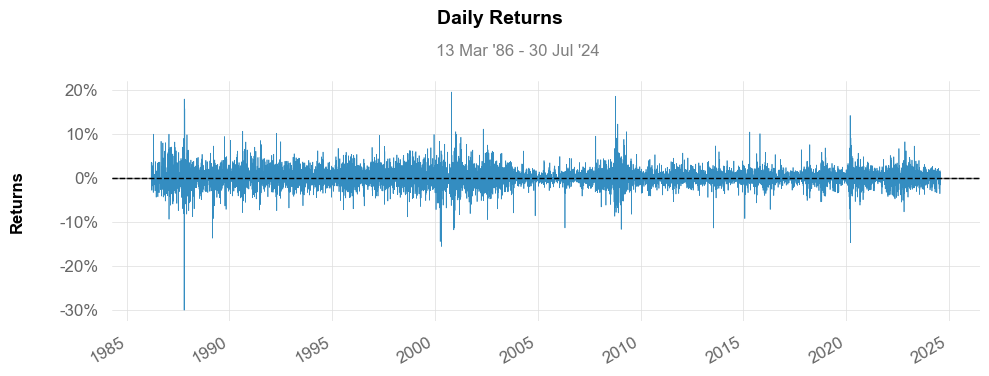

[*********************100%%**********************]  1 of 1 completed

GOOGL


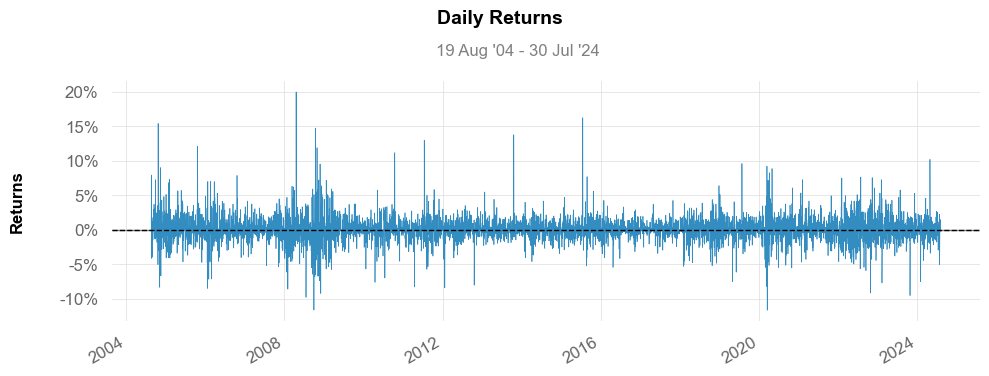

In [13]:
print('\n Daily Returns: \n')
for ticker in tickers:
    print(ticker)
    returns = qs.utils.download_returns(ticker)
    qs.plots.daily_returns(returns, benchmark=benchmark)


 Log Returns 

AAPL


[*********************100%%**********************]  1 of 1 completed


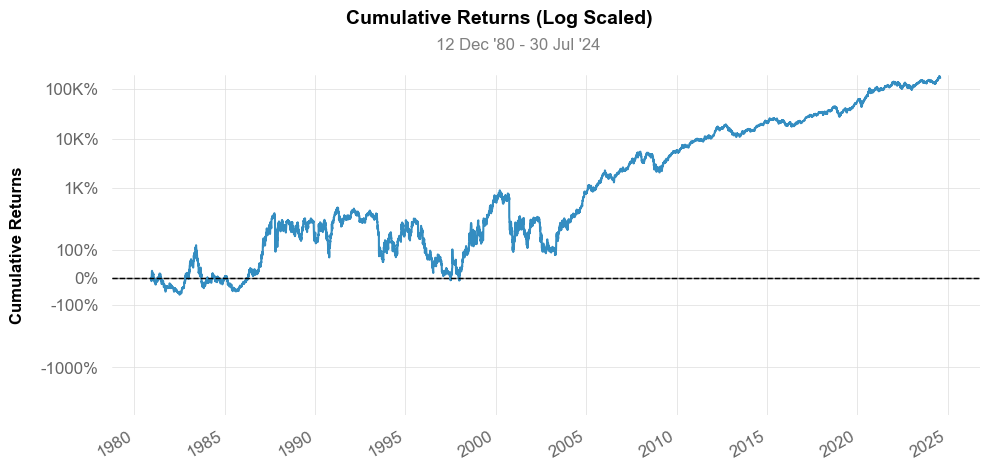

MSFT


[*********************100%%**********************]  1 of 1 completed


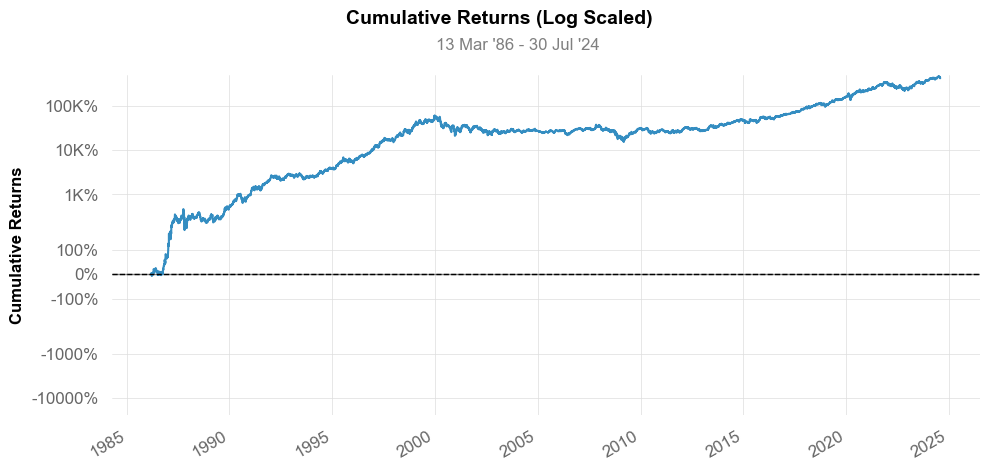

[*********************100%%**********************]  1 of 1 completed

GOOGL


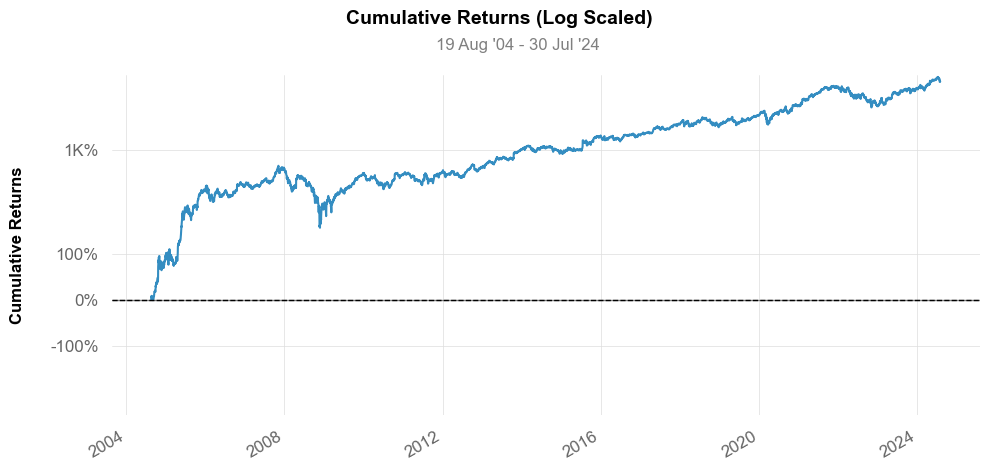

In [16]:
print("\n Log Returns \n")
for ticker in tickers:
    print(ticker)
    returns = qs.utils.download_returns(ticker)
    qs.plots.log_returns(returns, benchmark=benchmark)


 Yearly Returns 

AAPL


[*********************100%%**********************]  1 of 1 completed


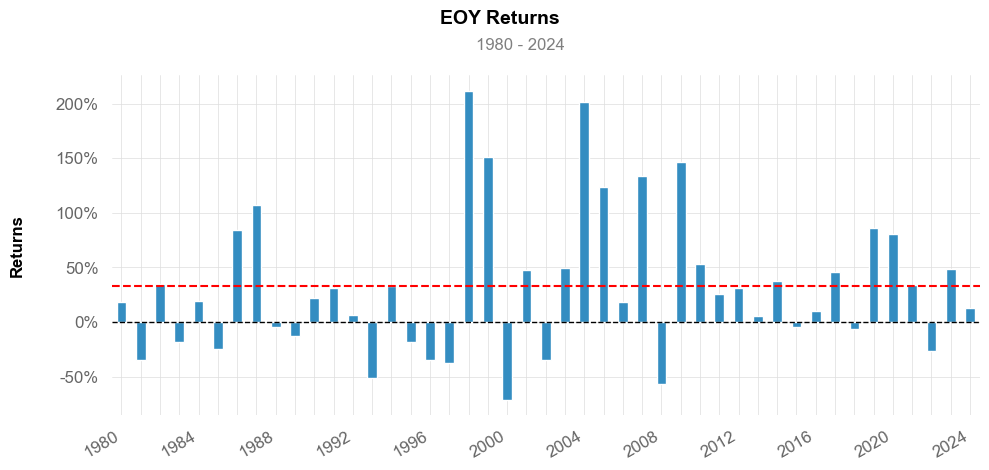

MSFT


[*********************100%%**********************]  1 of 1 completed


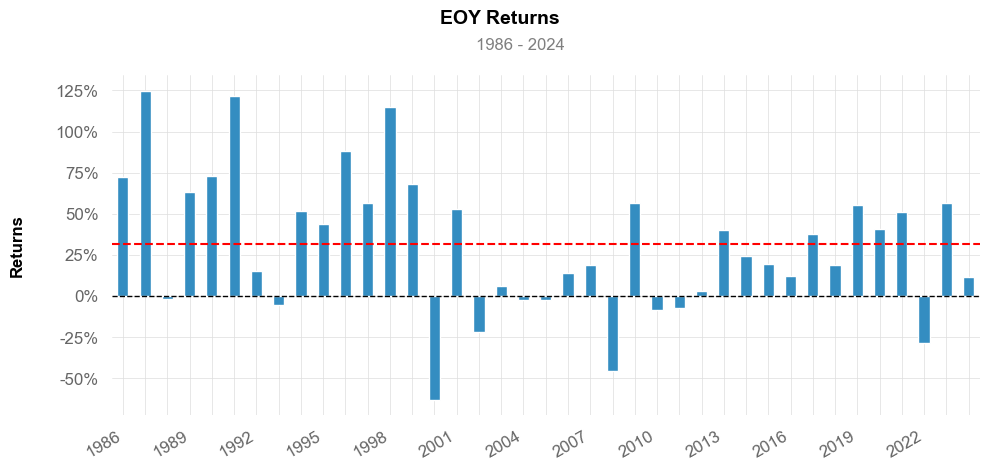

[*********************100%%**********************]  1 of 1 completed

GOOGL


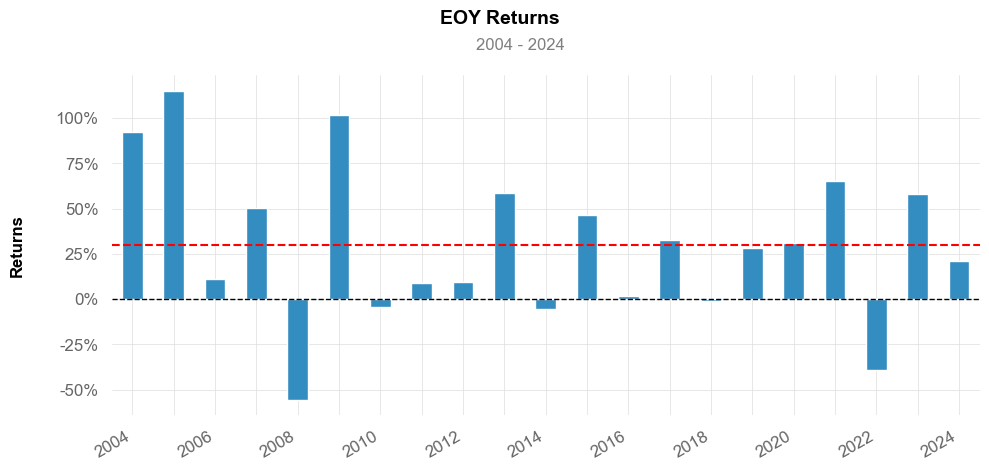

In [19]:
print("\n Yearly Returns \n")
for ticker in tickers:
    print(ticker)
    returns = qs.utils.download_returns(ticker)
    qs.plots.yearly_returns(returns, benchmark=benchmark)

In [25]:
weight = 1/len(tickers)
weighted_returns = pd.DataFrame()

for i, ticker in enumerate(tickers):
    returns = qs.utils.download_returns(ticker)
    weighted_returns[ticker] = returns*weight
portfolio_returns = weighted_returns.sum(axis=1)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [28]:
portfolio_returns

Date
1980-12-12    0.000000
1980-12-15   -0.017390
1980-12-16   -0.024466
1980-12-17    0.008250
1980-12-18    0.009664
                ...   
2024-07-24   -0.038332
2024-07-25   -0.020092
2024-07-26    0.005636
2024-07-29    0.006622
2024-07-30   -0.008821
Length: 10998, dtype: float64

In [31]:
tickers

['AAPL', 'MSFT', 'GOOGL']